# Use scVI and PeakVI to visualize *single-modal* latent space

In [1]:
# Hide warnings generated in notebook.
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import libraries.
import scanpy as sc
import scvi

OMP: Warning #234: OMP_NUM_THREADS: Invalid symbols found. Check the value "".
[rank: 0] Global seed set to 0


## Visualize latent space of single-modal *gene expression* data

Prior to integrating single-cell RNA and single-cell ATAC data using MultiVI trained on a multi-modal data set, visualize the latent representation of the single-modal gene expression data using **scVI**. 

**scVI** is the gene expression encoder used in MultiVI and can be trained on single-cell RNA data for 1) dimensionality reduction, 2) removal of unwanted variation, 3) integration across replicates, donors, and technologies, 4) differential expression, 5) imputation, and 6) normalization of other cell- and sample-level confounding factors.

### *Read data and visualize data structure*

In [3]:
# Load single-cell RNA data.
bn_rna = scvi.data.read_h5ad("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/data/bone-marrow_rna.h5ad")

# Look at the data set attributes.
bn_rna

AnnData object with n_obs × n_vars = 8627 × 17226
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'DoubletScores', 'n_counts', 'leiden', 'phenograph', 'log_n_counts', 'celltype', 'distance_to_closest', 'log_density', 'density', 'filtered_logdensity', 'filtered_density', 'celltype_combined', 'rna_pseudotime', 'atac_pseudotime', 'v', 'rna_log_density'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'PeakCounts'
    uns: 'celltype_combined_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'DM_EigenVectors', 'X_FDL', 'X_FDL_orig', 'X_pca', 'X_umap', 'X_umap_orig', 'rna_branch_probs'
    varm: 'PCs'
    layers: 'MAGIC_imputed_data'
    obsp: 'DMKernel', 'connectivities', 'distances', 'knn'

In [4]:
# Look at the head of the data.
bn_rna.var.head()

,n_cells,highly_variable,means,dispersions,dispersions_norm,PeakCounts
AL627309.1,103,False,0.032396,3.376752,0.271279,0
AL627309.5,387,False,0.125132,3.302549,0.216766,0
LINC01409,993,False,0.289841,3.125480,-0.800211,0
LINC01128,627,True,0.184895,3.387681,1.553986,0
LINC00115,292,False,0.086229,3.322483,0.051071,3


### *Set up the AnnData object using raw counts*


In [5]:
# Store raw counts in counts layer.
bn_rna.layers['counts'] = bn_rna.raw.X.copy()

In [6]:
# Set up AnnData object for training using the counts layer.
# OPTIONAL: Identify categorical and continuous covariates.
scvi.model.SCVI.setup_anndata(bn_rna, layer='counts')

### *Create and train scVI model*

In [7]:
# Create scVI model.
# rna_model = scvi.model.SCVI(bn_rna)

In [8]:
# Train the scVI model.
# rna_model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 400/400: 100%|██████████| 400/400 [04:55<00:00,  1.36it/s, loss=6.69e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [04:55<00:00,  1.36it/s, loss=6.69e+03, v_num=1]


In [9]:
# Save the trained scVI model.
# rna_model.save("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/bone-marrow_latent_space_scVI", overwrite=True)

In [6]:
# Load the trained scVI model.
rna_model = scvi.model.SCVI.load("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/bone-marrow_latent_space_scVI", adata=bn_rna)

INFO     File                                                                                                      
         /fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/bone-marrow_latent_space_scVI/mod
         el.pt already downloaded                                                                                  


### *Visualize the latent space of the scVI model*

In [7]:
# Store the latent representation from the model in the AnnData object.
latent = rna_model.get_latent_representation()
bn_rna.obsm["X_scVI"] = latent

In [8]:
# Look at the shape of the latent space.
print(latent.shape)

(8627, 10)


In [9]:
# Use the scVI latent space to generate a UMAP.
sc.pp.neighbors(bn_rna, use_rep="X_scVI")
sc.tl.umap(bn_rna, min_dist=0.3)

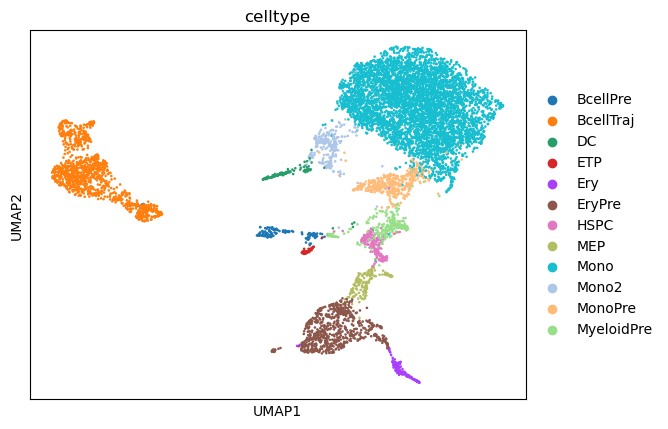

In [10]:
# Visualize UMAP of latent space.
sc.pl.umap(bn_rna, color=['celltype'])

## Visualize latent space of single-modal *chromatin accessibility* data

Prior to integrating single-cell RNA and single-cell ATAC data using MultiVI trained on a multi-modal data set, visualize the latent representation of the single-modal chromatin accessibility data using **PeakVI**. 

**PeakVI** is the chromatin accessibility encoder used in MultiVI and can be trained on single-cell ATAC data for 1) dimensionality reduction, 2) removal of unwanted variation, 3) integration across replicates, donors, and technologies, 4) differential expression, 5) imputation, and 6) normalization of other cell- and sample-level confounding factors.

### *Read data and visualize data structure*

In [11]:
# Load single-cell ATAC data.
bn_atac = scvi.data.read_h5ad("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/data/bone-marrow_atac.h5ad")

# Look at the data set attributes.
bn_atac

AnnData object with n_obs × n_vars = 8627 × 227734
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'Clusters', 'ReadsInPeaks', 'FRIP', 'leiden', 'phenograph', 'celltype', 'rnaPhenograph', 'rnaLeiden', 'sample', 'distance_to_closest', 'log_density', 'density', 'celltype_combined', 'rna_pseudotime', 'atac_pseudotime', 'atac_log_density'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'nearestGene', 'distToGeneStart', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx'
    uns: 'DM_EigenValues', 'GeneScoresColums', 'celltype_colors', 'celltype_combined_colors', 'leiden', 'leiden_colors', 'neighbors', 'phenograph_colors', 'rnaLeiden_colors', 'rnaPhenograph_colors', 'sample_colors', 'umap'
    obsm: 'DM_EigenVectors', 'GeneScores', 'X_Arc

In [12]:
# Look at the head of the data.
bn_atac.var.head()

,seqnames,start,end,width,strand,score,replicateScoreQuantile,groupScoreQuantile,Reproducibility,GroupReplicate,nearestGene,distToGeneStart,peakType,distToTSS,nearestTSS,GC,idx
chr1:804691-805191,chr1,804691,805191,501,*,11.77863,0.408,0.210,2,C14._.IM-1393_BoneMarrow_TcellDep_1_multiome,FAM87B,12430,Distal,8,uc057aum.1,0.4032,1
chr1:816084-816584,chr1,816084,816584,501,*,32.02962,0.583,0.465,2,C4._.IM-1393_BoneMarrow_TcellDep_1_multiome,FAM87B,1037,Promoter,1036,uc057aum.1,0.2894,2
chr1:817085-817585,chr1,817085,817585,501,*,76.69798,0.939,0.894,2,C9._.IM-1393_BoneMarrow_TcellDep_2_multiome,FAM87B,36,Promoter,35,uc057aum.1,0.4790,3
chr1:821956-822456,chr1,821956,822456,501,*,4.51031,0.157,0.026,2,C2._.IM-1393_BoneMarrow_TcellDep_1_multiome,FAM87B,4835,Distal,2931,uc057aum.1,0.5489,4
chr1:827289-827789,chr1,827289,827789,501,*,442.61270,0.952,0.936,2,C5._.IM-1393_BoneMarrow_TcellDep_2_multiome,LINC01128,2401,Promoter,16,uc057auo.1,0.6886,5


### *Set up the AnnData object*

In [3]:
# Set up AnnData object for training.
# OPTIONAL: Identify categorical and continuous covariates.
scvi.model.PEAKVI.setup_anndata(bn_atac)

### *Create and train PeakVI model*

In [4]:
# Create PeakVI model.
# atac_model = scvi.model.PEAKVI(bn_atac)

In [5]:
# Train the PeakVI model.
# atac_model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 102/500:  20%|██        | 102/500 [20:35<1:20:22, 12.12s/it, loss=3.08e+08, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 22214.520. Signaling Trainer to stop.


In [6]:
# Save the trained PeakVI model.
# atac_model.save("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/bone-marrow_latent_space_PeakVI", overwrite=True)

In [13]:
# Load the trained PeakVI model.
atac_model = scvi.model.PEAKVI.load("/fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/bone-marrow_latent_space_PeakVI", adata=bn_atac)

INFO     File                                                                                                      
         /fh/fast/setty_m/user/kfeldman/multi-modal_integration/scvi-tools/models/bone-marrow_latent_space_PeakVI/m
         odel.pt already downloaded                                                                                


### *Visualize the latent space of the PeakVI model*


In [14]:
# Store the latent representation from the model in the AnnData object.
latent = atac_model.get_latent_representation()
bn_atac.obsm["X_PeakVI"] = latent

In [15]:
# Look at the shape of the latent space.
print(latent.shape)

(8627, 21)


In [16]:
# Use the PeakVI latent space to generate a UMAP.
sc.pp.neighbors(bn_atac, use_rep="X_PeakVI")
sc.tl.umap(bn_atac, min_dist=0.3)

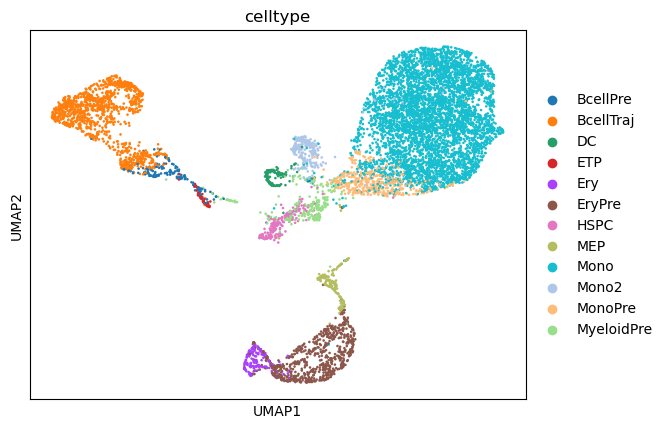

In [17]:
# Visualize UMAP of latent space.
sc.pl.umap(bn_atac, color=['celltype'])